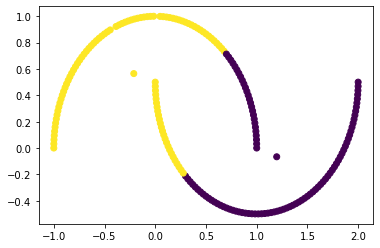

In [2]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets
import pandas as pd
import numpy as np
import time
%matplotlib inline

cluster_1 = (2**0.5)*np.random.randn(150,2)-[5,5]
cluster_2 = (3**0.5)*np.random.randn(150,2)
cluster_3 = np.random.randn(150,2)+[5,5]
#moon_set = sklearn.datasets.make_moons(200)

#cluster_all = np.concatenate((np.concatenate((cluster_1,cluster_2)),cluster_3))
moon_dataset = datasets.make_moons(200)
cluster = moon_dataset[0]
np.random.shuffle(cluster)

center_points = random.sample(list(cluster),2)

def K_means(data,c):

    kind = []
    for i in range(c):
        kind.append(0)

    iterator_times = 30
    iterator = 0   

    changed = True

    while iterator < iterator_times or changed==True:
        for i in range(cluster.shape[0]):
            mindis = 9999999
            now_kind = -1
            changed = False
            for j in range(2):
                dis = ((cluster[i][0]-center_points[j][0])**2+(cluster[i][1]-center_points[j][1])**2)**0.5
                if dis < mindis:
                    mindis = dis
                    now_kind = j
                    if now_kind != kind[i]:
                        changed = True
            kind[i]=now_kind

        for no in range(2):
            sum_x=0
            sum_y=0
            num=0
            for i in range(cluster.shape[0]):
                if kind[i] == no:
                    sum_x+=cluster[i][0]
                    sum_y+=cluster[i][1]
                    num+=1
            center_points[no][0]=sum_x/num
            center_points[no][1]=sum_y/num
        iterator+=1

    plt.scatter(cluster[:,0],cluster[:,1],c=kind)
    


